In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
a = np.ones((200,200))
b = np.zeros((200,200))
c = np.ones((200,200))
image = np.concatenate((a, b, c), axis=1)
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

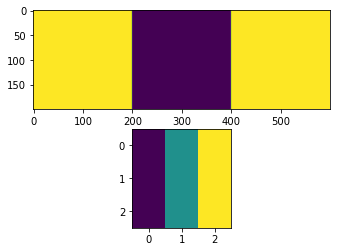

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(image)
ax2.imshow(kernel)

In [4]:
def convolution(image, kernel, padding = 0, stride = 1):
    
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]
    
    output_height = int(((image_height - kernel_height + 2*padding)/stride) + 1)
    output_width = int(((image_width - kernel_width + 2*padding)/stride) + 1)
    
    #pad the image
    if padding != 0:
        padded_image = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))
        padded_image[padding : padded_image.shape[0] - padding, padding : padded_image.shape[1] - padding] = image
    else:
        padded_image = image
    
    output_image = np.zeros((output_height, output_width))
    
    #convolution
    iim_i = 0
    iim_j = 0
    oim_i = 0
    oim_j = 0

    while True:
    
        output_image[oim_i, oim_j] = (kernel * padded_image[iim_i : iim_i + kernel_height, iim_j : iim_j + kernel_width]).sum()
        oim_j += 1
        if oim_j == output_image.shape[1]:
            oim_j = 0
            oim_i += 1
        if oim_i == output_image.shape[0]:
            break
        
        iim_j += stride
        if iim_j + kernel_width > padded_image.shape[1]:
            iim_j = 0
            iim_i += stride

        if iim_i + kernel_height > padded_image.shape[0]:
            break
    
    return output_image

(198, 598)
CPU times: user 285 ms, sys: 2.72 ms, total: 288 ms
Wall time: 286 ms


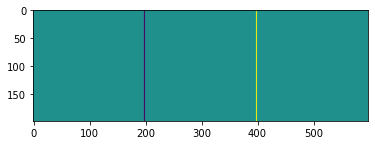

In [5]:
%%time
op1 = convolution(image, kernel, padding = 0)
print(op1.shape)
fig, ax = plt.subplots()
ax.imshow(op1)

# Convolution usign FFT

In [6]:
def convolution_fft(image, kernel, padding = 'same'):
    
    image_dim = np.array(image.shape)
    kernel_dim = np.array(kernel.shape)
    target_dim = image_dim + kernel_dim - 3
   
    fft = np.fft.fft2(image, target_dim) * np.fft.fft2(kernel, target_dim)
    output = np.fft.ifft2(fft).real
    
    if padding == 'valid':
        valid_dim = image_dim - kernel_dim + 1
        if any(valid_dim < 1):
            valid_dim = kernel_dim - image_dim + 1
        crop_start = (target_dim - valid_dim)//2
        crop_end = crop_start + valid_dim
        
        output = output[crop_start[0] : crop_end[0],
                        crop_start[1] : crop_end[1]]
    
    return output

(198, 598)
CPU times: user 28.6 ms, sys: 3.86 ms, total: 32.5 ms
Wall time: 31.6 ms


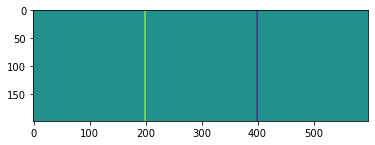

In [7]:
%%time
op2 = convolution_fft(image, kernel, padding = 'valid')
fig, ax = plt.subplots()
ax.imshow(op2)
print(op2.shape)